In [1]:
import numpy as np
import pandas as pd
import keras as tf
from keras.utils.vis_utils import model_to_dot
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from keras.models import Model, Sequential
from keras.layers import Embedding, Flatten, Input, merge, Dropout, Dense, BatchNormalization,Dot
from keras.utils.vis_utils import plot_model


First change  movie and user id into sequence from 1 to number of movie or user

In [2]:
dataset = pd.read_csv("Movie Recommendation Lab/ratings.csv", header=0, names=['user_id', 'movie_id', 'rating'])
np.random.seed(100)
movie_id_to_new_id = dict()
user_id_to_new_id = dict()
id = 1
user_id = 1
for index, row in dataset.iterrows():
    if movie_id_to_new_id.get(row['movie_id']) is None:
        movie_id_to_new_id[row['movie_id']] = id
        dataset.at[index, 'movie_id'] = id
        id += 1
    else:
        dataset.at[index, 'movie_id'] = movie_id_to_new_id.get(row['movie_id'])
        
    if user_id_to_new_id.get(row['user_id']) is None:
        user_id_to_new_id[row['user_id']] = user_id
        dataset.at[index, 'user_id'] = user_id
        user_id += 1
    else:
        dataset.at[index, 'user_id'] = user_id_to_new_id.get(row['user_id'])
num_users = len(dataset.user_id.unique())
num_movies = len(dataset.movie_id.unique())
train, test = train_test_split(dataset, test_size=0.2)
dataset.head()

,user_id,movie_id,rating
0,1,1,5
1,1,2,3
2,1,3,5
3,1,4,4
4,1,5,4


Building models

In [3]:
latent_dim = 10
movie_input = Input(shape=[1],name='movie-input')
movie_embedding = Embedding(num_movies + 1, latent_dim, name='movie-embedding')(movie_input)
movie_vec = Flatten(name='movie-flatten')(movie_embedding)
user_input = Input(shape=[1],name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding')(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)
prod = Dot(axes=1)([movie_vec, user_vec])
model = Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')


In [4]:
print(movie_vec)

KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='movie-flatten/Reshape:0', description="created by layer 'movie-flatten'")


In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 movie-input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 user-input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 movie-embedding (Embedding)    (None, 1, 10)        14660       ['movie-input[0][0]']            
                                                                                                  
 user-embedding (Embedding)     (None, 1, 10)        23540       ['user-input[0][0]']             
                                                                                              

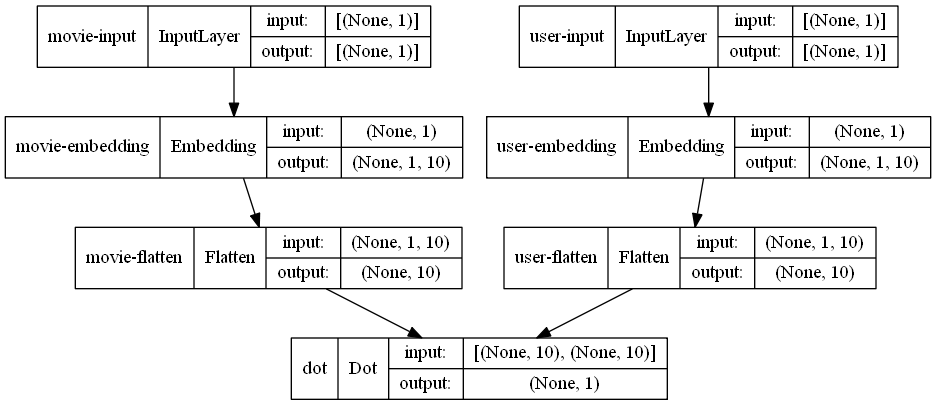

In [6]:
plot_model(model, to_file='model.png',show_shapes=True)

Train and test  models

Epoch 1/10
791/791 [==============================] - 1s 496us/step - loss: 13.8178
Epoch 2/10
791/791 [==============================] - 0s 493us/step - loss: 9.3751
Epoch 3/10
791/791 [==============================] - 0s 491us/step - loss: 4.6486
Epoch 4/10
791/791 [==============================] - 0s 504us/step - loss: 3.0692
Epoch 5/10
791/791 [==============================] - 0s 508us/step - loss: 2.3424
Epoch 6/10
791/791 [==============================] - 0s 498us/step - loss: 1.9124
Epoch 7/10
791/791 [==============================] - 0s 544us/step - loss: 1.6303
Epoch 8/10
791/791 [==============================] - 0s 546us/step - loss: 1.4326
Epoch 9/10
791/791 [==============================] - 0s 510us/step - loss: 1.2889
Epoch 10/10
791/791 [==============================] - 0s 509us/step - loss: 1.1794


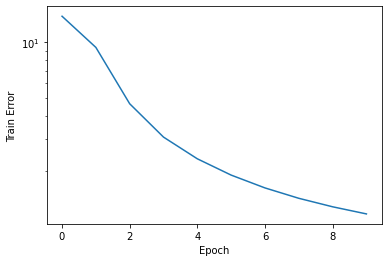

mean_absolute_error =  0.9639010124708479


In [7]:
history = model.fit([train.user_id, train.movie_id], train.rating, epochs=10)
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()
y_hat = np.round(model.predict([test.user_id, test.movie_id]), decimals=2)
y_true = test.rating
print('mean_absolute_error = ',mean_absolute_error(y_true, y_hat))


In [8]:
y_hat

array([[3.9 ],
       [2.45],
       [2.33],
       ...,
       [3.51],
       [4.85],
       [3.63]], dtype=float32)

In [9]:
mp = "NeuralMFmodel.h5"
model.save(mp)

(array([ 279.,   52.,  282.,  545., 1125., 2082., 1476.,  407.,   68.,
           8.]),
 array([-0.26     ,  0.425    ,  1.11     ,  1.7950001,  2.48     ,
         3.165    ,  3.8500001,  4.5350003,  5.2200003,  5.905    ,
         6.59     ], dtype=float32),
 <BarContainer object of 10 artists>)

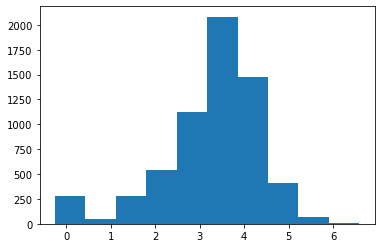

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


plt.hist(y_hat )